## UK 다른 데이터셋도 SAVE와 같이 밤~새벽에 전기사용량이 많은가?

### REFIT 데이터 로드
### 8초 데이터 -> 1시간 단위로 변경

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
font = {'size': 16, 'family':"Malgun Gothic"}
matplotlib.rc('font', **font)

df = pd.DataFrame()
for i in range(1, 11):
    path = f'D:/ISP/3. 데이터/ENERGY/REFIT/Processed_Data_CSV/House_{i}.csv'
    data = pd.read_csv(path)

    data.set_index('Time', inplace=True)
    data.index = pd.to_datetime(data.index)

    # 8초 데이터를 1시간 데이터로
    time = []
    arr = []

    start_date = pd.to_datetime('2013-10-09 13:00:00')
    end_date = pd.to_datetime('2013-10-09 14:00:00')
    while True:
        time.append(start_date)
        arr.append(np.nanmedian(data.loc[start_date:end_date,'Aggregate'], axis=0) / 1000)

        start_date = start_date + pd.Timedelta('1 hour')
        end_date = end_date + pd.Timedelta('1 hour')

        if start_date > pd.to_datetime('2014-07-01 00:00:00'):
            break
    df[f'energy_{i}'] = arr

df['Time'] = time

# 13시 시작 => 00시 시작
df = df.iloc[11:-1,:].reset_index(drop = True)
df.set_index('Time', inplace=True)

df[df == 0] = np.nan

C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### 한 집에 대해서 plot

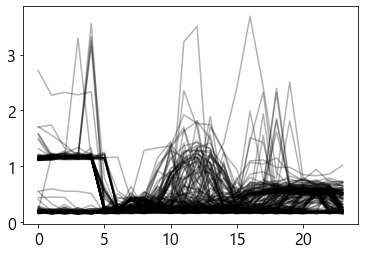

In [23]:
data_rs = df.iloc[:,0].values.reshape(-1, 24)

plt.figure(figsize = (6, 4))
plt.plot(data_rs.T, color = 'k', alpha = 0.3)
plt.show()

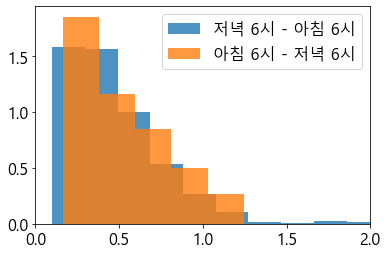

In [39]:
plt.figure()
plt.hist(np.concatenate([data_rs[:,0:6].reshape(-1)] + [data_rs[:,18:].reshape(-1)]), label = '저녁 6시 - 아침 6시', bins = 10, alpha = 0.8,\
         histtype='stepfilled', density = True)
plt.hist(data_rs[:,6:18].reshape(-1), label = '아침 6시 - 저녁 6시', bins = 5, alpha = 0.8,\
         histtype='stepfilled', density = True)
plt.xlim(0, 2)
plt.legend()
plt.show()

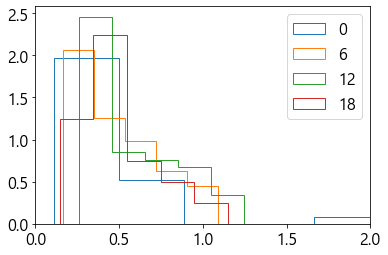

In [40]:
plt.figure()
step = 6
for i in range(0, 24, step):
    plt.hist(data_rs[:,i:i+step].reshape(-1), label = i, bins = 5, alpha = 1,\
         histtype='step', density = True)
plt.xlim(0, 2)
plt.legend()
plt.show()

### 여러 집에 대해서 plot

In [29]:
import os
os.chdir('../')


In [30]:
from module.util_main import downsampling, dim_reduct
data_rs, _ = dim_reduct(df.values, 24 * 4, th = 0)

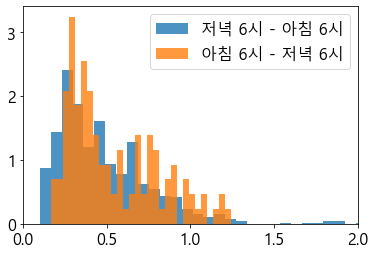

In [35]:
plt.figure()
plt.hist(np.concatenate([data_rs[:,0:6].reshape(-1)] + [data_rs[:,18:].reshape(-1)]), label = '저녁 6시 - 아침 6시', bins = 30, alpha = 0.8,\
         histtype='stepfilled', density = True)
plt.hist(data_rs[:,6:18].reshape(-1), label = '아침 6시 - 저녁 6시', bins = 30, alpha = 0.8,\
         histtype='stepfilled', density = True)
plt.xlim(0, 2)
plt.legend()
plt.show()